In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

# Análisis exploratorio

In [2]:
df =  pd.read_parquet('logs.parquet')

## Información general dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74307 entries, 0 to 74306
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        74307 non-null  datetime64[ns]
 1   Usuario      74307 non-null  object        
 2   ID           74307 non-null  int64         
 3   Acceso       74307 non-null  object        
 4   Descripción  74307 non-null  object        
 5   IP           74307 non-null  object        
 6   Evento       74307 non-null  object        
 7   nsesiones    15323 non-null  Int64         
 8   pieza        32807 non-null  object        
 9   piezaid      32807 non-null  Int64         
 10  catalogo     32807 non-null  object        
 11  diseñoid     42825 non-null  Int64         
 12  userid       10979 non-null  Int64         
 13  minutos      4893 non-null   float64       
 14  fabricante   86 non-null     object        
 15  logo         7 non-null      object        
 16  emai

In [4]:
df.describe(include='all')

,Fecha,Usuario,ID,Acceso,Descripción,IP,Evento,nsesiones,pieza,piezaid,catalogo,diseñoid,userid,minutos,fabricante,logo,email
count,74307,74307,7.430700e+04,74307,74307,74307,74307,15323.0,32807,32807.0,32807,42825.0,10979.0,4893.000000,86,7,5
unique,NaN,769,NaN,3,33084,897,20,<NA>,9506,<NA>,110,<NA>,<NA>,NaN,12,7,4
top,NaN,#0 - null,NaN,OK,Visualizar presupuesto para el diseño con id: -1,-1,AÑADIR_PIEZA,<NA>,EE-PILAR-01,<NA>,Estandar,<NA>,<NA>,NaN,Glicerio Chaves,logo_user_20793_AYDX,chelo@biancamuebles.com
freq,NaN,10721,NaN,58766,716,10624,32807,<NA>,487,<NA>,7896,<NA>,<NA>,NaN,24,1,2
mean,2025-01-27 00:13:45.141911040,NaN,4.429317e+06,NaN,NaN,NaN,NaN,68.795275,NaN,259208.414393,NaN,60806.349515,10303.772384,116.187576,NaN,NaN,NaN
min,2025-01-20 12:55:00,NaN,4.392164e+06,NaN,NaN,NaN,NaN,0.0,NaN,18.0,NaN,-1.0,2.0,0.109067,NaN,NaN,NaN
25%,2025-01-23 13:00:00,NaN,4.410740e+06,NaN,NaN,NaN,NaN,44.0,NaN,35004.5,NaN,-1.0,2754.0,61.596684,NaN,NaN,NaN
50%,2025-01-27 14:23:00,NaN,4.429317e+06,NaN,NaN,NaN,NaN,76.0,NaN,307417.0,NaN,87029.0,13565.0,71.903300,NaN,NaN,NaN
75%,2025-01-30 11:15:30,NaN,4.447894e+06,NaN,NaN,NaN,NaN,95.0,NaN,410765.5,NaN,87859.0,16851.0,112.725600,NaN,NaN,NaN
max,2025-02-03 14:01:00,NaN,4.466470e+06,NaN,NaN,NaN,NaN,134.0,NaN,510395.0,NaN,88756.0,21324.0,18870.260000,NaN,NaN,NaN


In [5]:
df.head(10)

,Fecha,Usuario,ID,Acceso,Descripción,IP,Evento,nsesiones,pieza,piezaid,catalogo,diseñoid,userid,minutos,fabricante,logo,email
0,2025-02-03 14:01:00,#0 - null,4466470,CONN,(Sesiones activas 56) Sesión conectada,-1,CONEXION,56,None,<NA>,None,<NA>,<NA>,NaN,None,None,None
1,2025-02-03 14:01:00,#13856 - COLCHONERIA 3000. S.L.,4466469,OK,Añadida la pieza M10749 con id 419579 del catá...,86.106.2.231,AÑADIR_PIEZA,<NA>,M10749,419579,APARICIO DONOSO - Explora 2.0,88756,<NA>,NaN,None,None,None
2,2025-02-03 14:01:00,#2708 - GRUPO HERVI FUENTE ALAMO SL,4466468,OK,Añadida la pieza B1207 con id 30515 del catálo...,83.138.40.18,AÑADIR_PIEZA,<NA>,B1207,30515,MUEBLES MÁGINA - Kloset,88755,<NA>,NaN,None,None,None
3,2025-02-03 14:01:00,#15274 - DIJUVE,4466467,OK,Visualizar presupuesto para el diseño con id: ...,83.48.121.13,VER_PRESUPUESTO,<NA>,None,<NA>,None,88431,<NA>,NaN,None,None,None
4,2025-02-03 14:01:00,#0 - null,4466466,CONN,(Sesiones activas 55) Sesión desconectada,-1,DESCONEXION,55,None,<NA>,None,<NA>,<NA>,NaN,None,None,None
5,2025-02-03 14:01:00,#0 - null,4466465,CONN,(Sesiones activas 56) Sesión desconectada,-1,DESCONEXION,56,None,<NA>,None,<NA>,<NA>,NaN,None,None,None
6,2025-02-03 14:00:00,#20559 - ARTIKALIA RAUL,4466464,OK,Añadida la pieza TC102 con id 411252 del catál...,188.240.237.116,AÑADIR_PIEZA,<NA>,TC102,411252,GRUPO SEYS - Comedores 2023,88274,<NA>,NaN,None,None,None
7,2025-02-03 14:00:00,#20559 - ARTIKALIA RAUL,4466463,OK,Añadida la pieza TC104 con id 411254 del catál...,188.240.237.116,AÑADIR_PIEZA,<NA>,TC104,411254,GRUPO SEYS - Comedores 2023,88274,<NA>,NaN,None,None,None
8,2025-02-03 14:00:00,#20559 - ARTIKALIA RAUL,4466462,OK,Añadida la pieza SOF-022 con id 4684 del catál...,188.240.237.116,AÑADIR_PIEZA,<NA>,SOF-022,4684,Estandar,88274,<NA>,NaN,None,None,None
9,2025-02-03 13:59:00,#15274 - DIJUVE,4466461,OK,Generar presupuesto pdf para el diseño con id:...,83.48.121.13,GEN_PRESUPUESTO,<NA>,None,<NA>,None,88431,<NA>,NaN,None,None,None


In [6]:
df.nunique()

Fecha          10413
Usuario          769
ID             74307
Acceso             3
Descripción    33084
IP               897
Evento            20
nsesiones        135
pieza           9506
piezaid        10710
catalogo         110
diseñoid        2781
userid           770
minutos         4884
fabricante        12
logo               7
email              4
dtype: int64

In [7]:
df.isnull().sum()

Fecha              0
Usuario            0
ID                 0
Acceso             0
Descripción        0
IP                 0
Evento             0
nsesiones      58984
pieza          41500
piezaid        41500
catalogo       41500
diseñoid       31482
userid         63328
minutos        69414
fabricante     74221
logo           74300
email          74302
dtype: int64

## TOP columnas más importantes

In [8]:
top_usuarios = df['Usuario'].value_counts().head()
top_usuarios

Usuario
#0 - null                  10721
#3895 - IZARI BI            1210
#353 - DEKOSULAR            1096
#239 - MERKA VALLADOLID      798
#2784 - MUEBLES BOSQUE       779
Name: count, dtype: int64

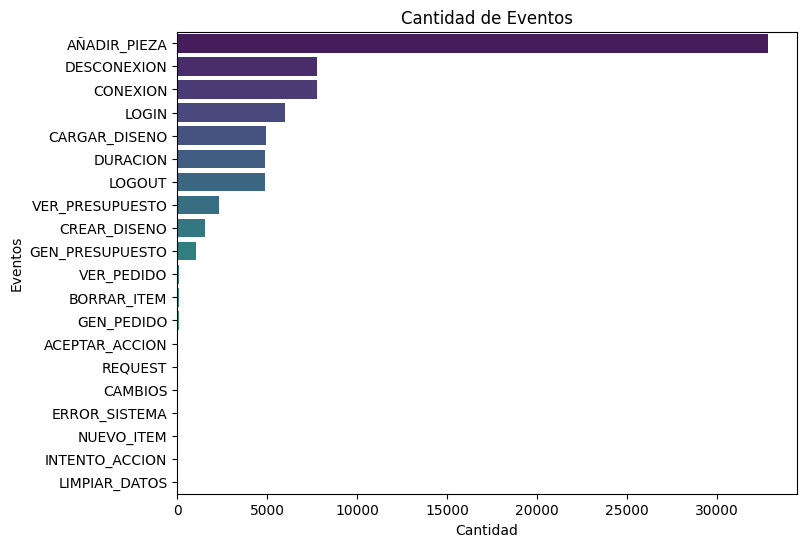

In [9]:
top_eventos = df['Evento'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=top_eventos.values, y=top_eventos.index, hue=top_eventos.index, palette="viridis")
plt.title('Cantidad de Eventos')
plt.xlabel('Cantidad') 
plt.ylabel('Eventos')
plt.show()

In [10]:
porcentaje_eventos = df['Evento'].value_counts(normalize=True) * 100
porcentaje_eventos

Evento
AÑADIR_PIEZA       44.150618
DESCONEXION        10.444507
CONEXION           10.437778
LOGIN               8.050386
CARGAR_DISENO       6.637329
DURACION            6.584844
LOGOUT              6.584844
VER_PRESUPUESTO     3.095267
CREAR_DISENO        2.059025
GEN_PRESUPUESTO     1.387487
VER_PEDIDO          0.152072
BORRAR_ITEM         0.131885
GEN_PEDIDO          0.115736
ACEPTAR_ACCION      0.056522
REQUEST             0.048448
CAMBIOS             0.036336
ERROR_SISTEMA       0.009420
NUEVO_ITEM          0.009420
INTENTO_ACCION      0.006729
LIMPIAR_DATOS       0.001346
Name: proportion, dtype: float64

In [11]:
top_diseños = df[df['Evento'] == 'AÑADIR_PIEZA']['diseñoid'].value_counts().head()
top_diseños

diseñoid
-1       11303
86499      213
0          150
65674      100
87144       94
Name: count, dtype: Int64

In [12]:
top_piezas = df[df['Evento'] == 'AÑADIR_PIEZA']['pieza'].value_counts().head(5)
top_piezas

pieza
EE-PILAR-01    487
EE-VCR-01      468
EE-RAD-01      271
EE-PCI-01      234
SGE-001        222
Name: count, dtype: int64

In [13]:
top_catalogos = df[df['Evento'] == 'AÑADIR_PIEZA']['catalogo'].value_counts().head(5)
top_catalogos

catalogo
Estandar                          7896
GLICERIO CHAVES - Eos Cosmo FR    2134
APARICIO DONOSO - Area Joven      2062
MONTES - Social Style             1666
MUEBLES MÁGINA - WhyNot           1637
Name: count, dtype: int64

In [14]:
df_añadir_pieza = df[df['Evento'] == 'AÑADIR_PIEZA'].copy()
# Agrupar por catalogo y pieza y obtener la frecuencia de cada pieza en cada catalogo
frecuencia_piezas = (df_añadir_pieza
                  .groupby('catalogo')['pieza']
                  .value_counts()
                 )
# Devuelve una lista de los 5 catalogos mas usados
top_catalogos_lista = df[df['Evento'] == 'AÑADIR_PIEZA']['catalogo'].value_counts().head(5).index.tolist()
# Filtra frecuencia_piezas quedandome solo con los que contienen los catalogos en la lista de toptop_catalogos_lista
filtro_catalogos = frecuencia_piezas[frecuencia_piezas.index.get_level_values('catalogo').isin(top_catalogos_lista)]
# Me quedo con las 5 piezas mas repetidas dentro de cada catalogo
top_piezas_catalogo = filtro_catalogos.groupby(level='catalogo').head(5)
# Ordena segun la lista inicial de los catalogos principales
resultado_final_ordenado = top_piezas_catalogo.reindex(top_catalogos_lista, level='catalogo')
resultado_final_ordenado

catalogo                        pieza      
Estandar                        EE-PILAR-01    487
                                EE-VCR-01      468
                                EE-RAD-01      271
                                EE-PCI-01      234
                                SGE-001        222
GLICERIO CHAVES - Eos Cosmo FR  MJ3438          30
                                MJ3436          26
                                MJ2011FV        21
                                MJ2910          20
                                MJ4187          20
APARICIO DONOSO - Area Joven    W4680           28
                                W4682           26
                                W4675           25
                                W4624           23
                                W4684           22
MONTES - Social Style           MC1593          48
                                MZ3176          24
                                MA1104          20
                                MZ3118

In [15]:
piezas_por_diseño = df_añadir_pieza.groupby('diseñoid').size()
print('Top 10 diseños con más piezas')
print(piezas_por_diseño.sort_values(ascending = False).head(10))
print('Estadisticas de piezas por diseño')
piezas_por_diseño.describe()

Top 10 diseños con más piezas
diseñoid
-1       11303
86499      213
0          150
65674      100
87144       94
87854       94
88460       91
85139       90
85709       89
87451       89
dtype: int64
Estadisticas de piezas por diseño


count     1696.000000
mean        19.343750
std        274.590285
min          1.000000
25%          3.000000
50%          8.000000
75%         17.000000
max      11303.000000
dtype: float64

<Axes: xlabel='minutos'>

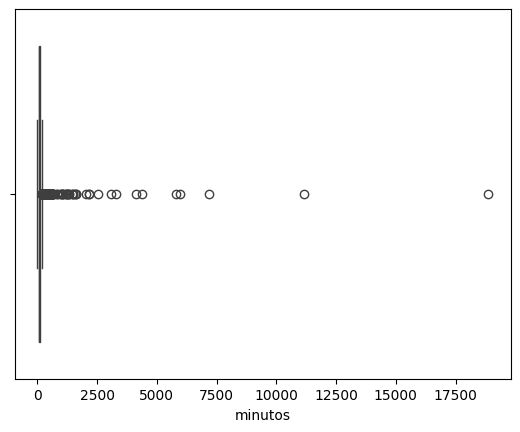

In [16]:
duraciones = df[df['Evento'] == 'DURACION']['minutos'].dropna()
sns.boxplot(x=duraciones)

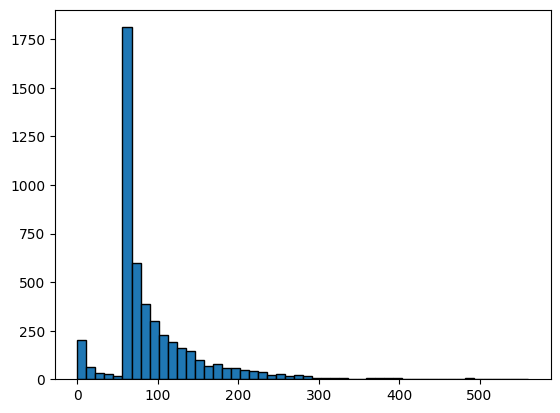

In [17]:
#Quitar los outliers
duraciones_plot = duraciones[duraciones < duraciones.quantile(0.99)]
plt.hist(duraciones_plot, bins=50, edgecolor='black')
plt.show()

In [18]:
rango = [0, 5, 15, 30, 60, 90, 120, np.inf]
etiquetas = ['0-5 min', '5-15 min', '15-30 min', '30-60 min', '60-90 min', '90-120 min', '120+ min']
duracion = pd.cut(duraciones, bins = rango, labels = etiquetas, right = False)
duracion.value_counts().sort_index()

minutos
0-5 min        151
5-15 min        80
15-30 min       55
30-60 min       63
60-90 min     2795
90-120 min     647
120+ min      1102
Name: count, dtype: int64

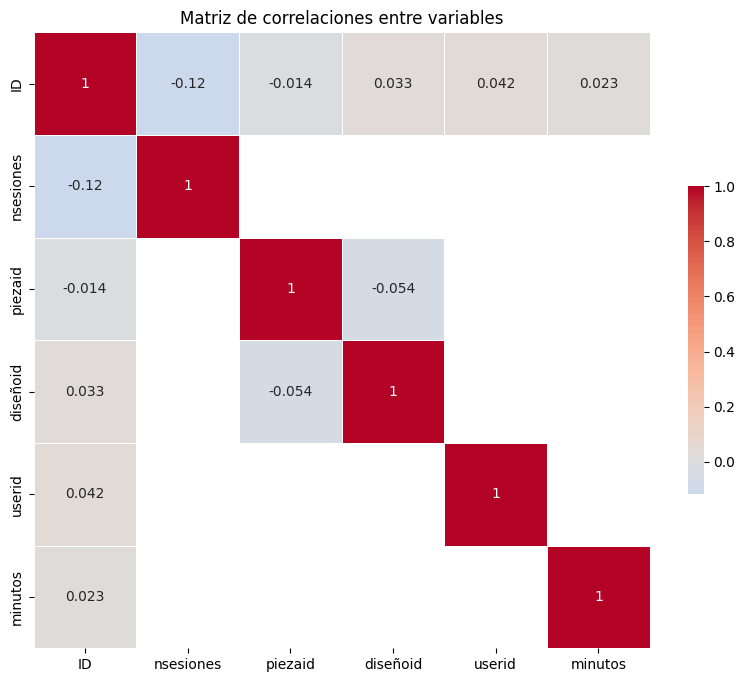

In [19]:
numerico = df.select_dtypes(include=[np.number])
correlacion = numerico.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matriz de correlaciones entre variables')
plt.show()

In [20]:
tabla_evento_acceso = pd.crosstab(df['Evento'], df['Acceso'])
print("Tabla de Contingencia:")
print(tabla_evento_acceso)

Tabla de Contingencia:
Acceso           CONN  ERROR     OK
Evento                             
ACEPTAR_ACCION      0      3     39
AÑADIR_PIEZA        0      0  32807
BORRAR_ITEM         0      0     98
CAMBIOS             0      0     27
CARGAR_DISENO       0      0   4932
CONEXION         7756      0      0
CREAR_DISENO        0      0   1530
DESCONEXION      7761      0      0
DURACION            0      0   4893
ERROR_SISTEMA       0      7      0
GEN_PEDIDO          0      0     86
GEN_PRESUPUESTO     0      0   1031
INTENTO_ACCION      0      5      0
LIMPIAR_DATOS       0      0      1
LOGIN               0      9   5973
LOGOUT              0      0   4893
NUEVO_ITEM          0      0      7
REQUEST             0      0     36
VER_PEDIDO          0      0    113
VER_PRESUPUESTO     0      0   2300


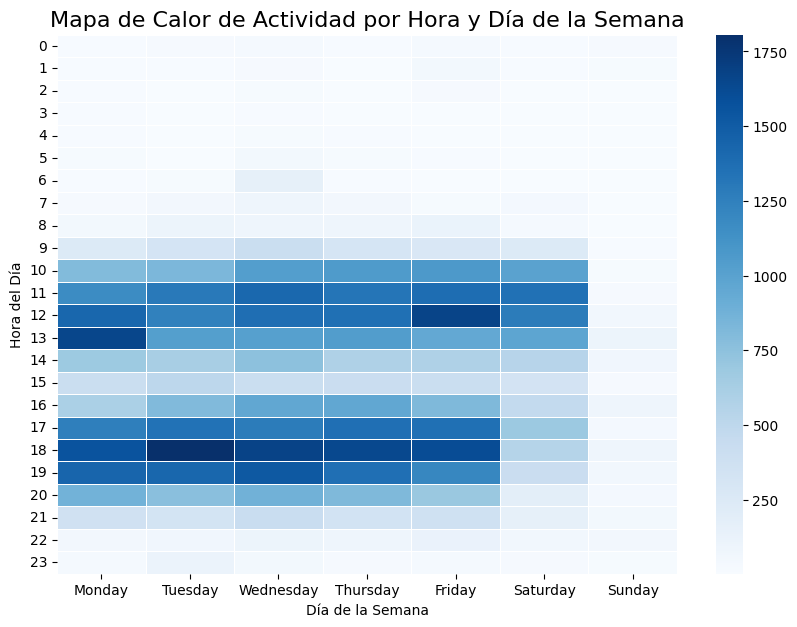

In [21]:
df['Hora'] = df['Fecha'].dt.hour
df['NombreDia'] = df['Fecha'].dt.day_name()

heatmap = df.groupby(['Hora', 'NombreDia']).size().unstack()

dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap = heatmap.reindex(columns=dias_ordenados, fill_value=0)

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap, cmap="Blues", linewidths=.5, annot=False)
plt.title('Mapa de Calor de Actividad por Hora y Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana')
plt.ylabel('Hora del Día')
plt.yticks(rotation=0) 
plt.show()

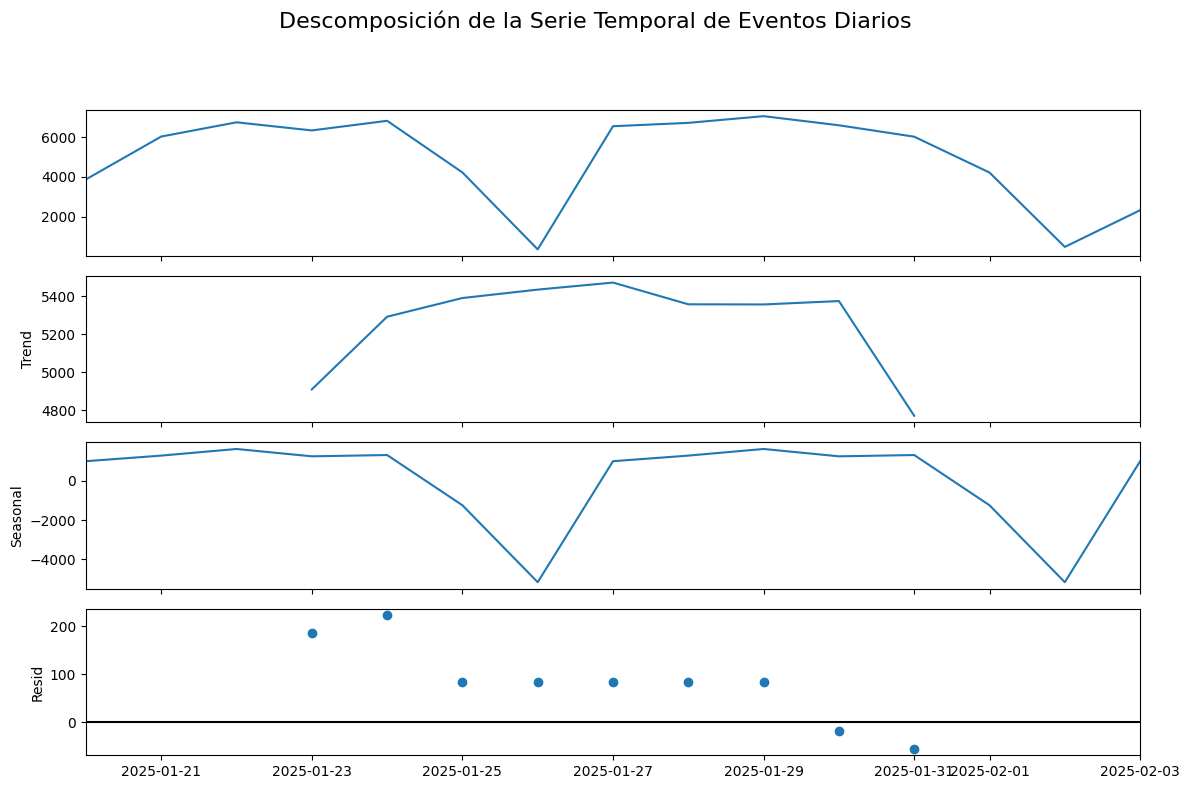

In [22]:
actividad_diaria = df.resample('D', on='Fecha').size()
descomposicion = seasonal_decompose(actividad_diaria, model='additive', period=7)
fig = descomposicion.plot()
fig.set_size_inches(12, 8)
fig.suptitle('Descomposición de la Serie Temporal de Eventos Diarios', y=1.01, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout
plt.show()

In [23]:
actividad_diaria = df.resample('D', on='Fecha').size()
actividad_diaria = actividad_diaria.fillna(0)
def test_adf(serie):  
    resultado_adf = adfuller(serie, autolag='AIC')
    print(f'ADF Statistic: {resultado_adf[0]:.4f}')
    print(f'p-value: {resultado_adf[1]:.4f}')
    print('Critical Values:')
    for key, value in resultado_adf[4].items():
        print(f'\t{key}: {value:.4f}')

    if resultado_adf[0] < resultado_adf[4]["5%"]:
        print(f"CONCLUSION: p-valor ({resultado_adf[1]:.4f}) <= 0.05 -> Rechazamos H0.")
        print("La serie probablemente NO tiene raíz unitaria y es ESTACIONARIA.")
    else:
        print(f"CONCLUSION: p-valor ({resultado_adf[1]:.4f}) > 0.05 -> No podemos rechazar H0.")
        print("La serie probablemente TIENE raíz unitaria y es NO ESTACIONARIA.")

test_adf(actividad_diaria)


ADF Statistic: -2.4383
p-value: 0.1312
Critical Values:
	1%: -4.4731
	5%: -3.2899
	10%: -2.7724
CONCLUSION: p-valor (0.1312) > 0.05 -> No podemos rechazar H0.
La serie probablemente TIENE raíz unitaria y es NO ESTACIONARIA.
